Imports

In [9]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Connection to database

In [16]:
db = 'ign_naturstyrelsen'
user = 'edin'
password = ''
host = '10.0.1.30'

connection_string = f'postgresql+psycopg2://{user}:{password}@{host}/{db}'

con = create_engine(connection_string)

Antal punkter i databasen

In [20]:
q_stmt = "SELECT COUNT(*) FROM raw_data"

antal_punkter = con.execute(q_stmt).first()[0]

print(f'Antal punkter i rådata: {antal_punkter}')


Antal punkter i rådata: 8939348


In [24]:
q_stmt = "SELECT COUNT(*) FROM route"

antal_ruter_i_alt = con.execute(q_stmt).first()[0]

print(f'Antal ruter i alt (max 10 min mellem to registreringer): {antal_ruter_i_alt}')


Antal ruter i alt (max 10 min mellem to registreringer): 1892029


In [27]:
q_stmt = "SELECT COUNT(*) FROM route where n_points > 1"

antal_ruter = con.execute(q_stmt).first()[0]

print(f'Antal ruter mere med end en registrering: {antal_ruter}')

Antal ruter mere med end en registrering: 1013353


In [38]:
q_stmt = "SELECT n_points FROM route where n_points > 1"
n_points_df = pd.read_sql(q_stmt, con)
n_points_df["n_points"].describe()


count    1.013353e+06
mean     7.955494e+00
std      2.190695e+01
min      2.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      5.892000e+03
Name: n_points, dtype: float64

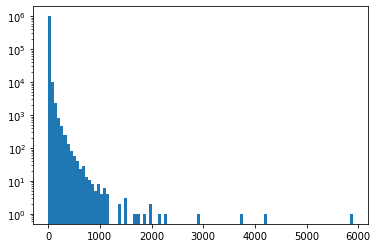

In [39]:
plt.yscale('log')
n_points_hist = plt.hist(n_points_df['n_points'], 100)

In [40]:
q_stmt = """select device_id, count(*) 
            from route where n_points > 1 
            group by device_id"""
routers_per_device = pd.read_sql(q_stmt, con)
routers_per_device["count"].describe()

count    56390.000000
mean        17.970438
std         87.074516
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       5551.000000
Name: count, dtype: float64

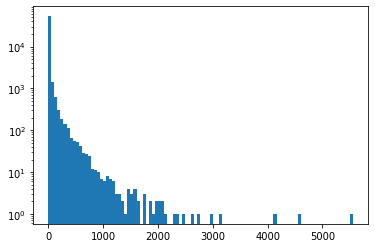

In [41]:
plt.yscale('log')
n_points_hist = plt.hist(routers_per_device["count"], 100)

In [43]:
route_id = 635648
route_id = 1581962 #beboelse ???

In [4]:
route_devices_sql = "SELECT COUNT(*) FROM (SELECT DISTINCT device_id FROM route) as temp"
all_devices_sql = "SELECT COUNT(*) from device"
n_route_devices = con.execute(route_devices_sql).first()[0]
n_devices = con.execute(all_devices_sql).first()[0]
print('{} devices analyzed ({:.2f}%)'.format(n_route_devices, n_route_devices/n_devices*100))

81512 devices analyzed (100.00%)


In [14]:
device_route_count_sql = "SELECT device_id, COUNT(*) FROM route where n_points > 1 GROUP BY device_id"
n_points_sql = "SELECT n_points FROM route where n_points > 1"
device_route_count_df = pd.read_sql(device_route_count_sql, con)
n_points_df = pd.read_sql(n_points_sql, con)

56390 devices with routes
Median 3 routes per device


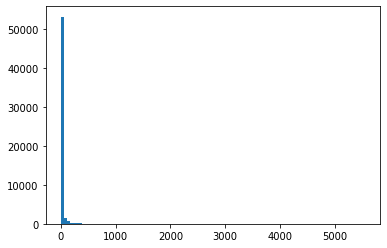

In [15]:
print('{} devices with routes'.format(len(device_route_count_df)))
print('Median {} routes per device'.format(int(np.median(device_route_count_df['count']))))
device_route_hist = plt.hist(device_route_count_df['count'], 100)

1013353 routes with more than one point
Median 4 points per route


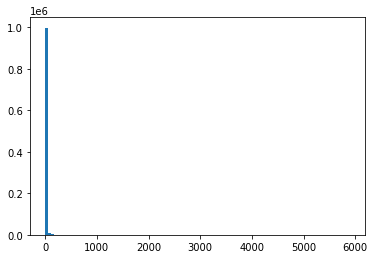

In [13]:
print('{} routes with more than one point'.format(len(n_points_df)))
print('Median {} points per route'.format(int(np.median(n_points_df['n_points']))))
n_points_hist = plt.hist(n_points_df['n_points'], 100)